# Embedding Analysis

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import scvi

# Flu

In [4]:
flu_data = sc.read_h5ad("../data/inference/influenza_lee_czi_preds_hvg.h5ad")
flu_data

AnnData object with n_obs × n_vars = 10519 × 2000
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'predictions', 'predicted_celltype', 'true_coarse', 'pred_coarse'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'pca', 'pred_coarse_colors', 'predictions_colors', 'true_coarse_colors', '

In [3]:
flu_data_for_hvg = sc.read_h5ad("../data/inference/covid_all_czi_preds.h5ad")
sc.pp.normalize_total(flu_data_for_hvg, target_sum=1e4)
flu_data_for_hvg.layers["counts"] = flu_data_for_hvg.X.copy()
flu_data_for_hvg.raw = flu_data_for_hvg  # keep full dimension safe
sc.pp.highly_variable_genes(
    flu_data_for_hvg,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="dataset_id",
    subset=True,
)

/home/s5srinivasan/py39env/lib64/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [4]:
scvi.model.SCVI.setup_anndata(flu_data_for_hvg, layer="counts", batch_key="dataset_id")
model = scvi.model.SCVI(flu_data_for_hvg, n_layers=2, n_latent=30, gene_likelihood="nb")
model.train()
SCVI_LATENT_KEY = "X_scvi"
flu_data_for_hvg.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


/home/s5srinivasan/py39env/lib64/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
Trainer will use only 1 of 3 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=3)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A30') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUD

Epoch 98/98: 100%|██████████| 98/98 [08:00<00:00,  4.79s/it, v_num=1, train_loss_step=1.03e+3, train_loss_epoch=999]    

`Trainer.fit` stopped: `max_epochs=98` reached.


Epoch 98/98: 100%|██████████| 98/98 [08:00<00:00,  4.90s/it, v_num=1, train_loss_step=1.03e+3, train_loss_epoch=999]


In [5]:
sc.pp.neighbors(flu_data_for_hvg, use_rep="X_scvi")
sc.tl.umap(flu_data_for_hvg)
# Store UMAP coordinates from PCA in a new layer
flu_data_for_hvg.obsm["X_umap_scvi"] = flu_data_for_hvg.obsm["X_umap"]

In [6]:
sc.pp.neighbors(flu_data_for_hvg, use_rep="X_pca")
sc.tl.umap(flu_data_for_hvg)
# Store UMAP coordinates from PCA in a new layer
flu_data_for_hvg.obsm["X_umap_pca"] = flu_data_for_hvg.obsm["X_umap"]

In [7]:
flu_data

AnnData object with n_obs × n_vars = 81802 × 61891
    obs: 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'batch', 'predictions', 'predicted_celltype', 'leiden_scgpt'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'
    uns: 'cell_type_colors', 'dataset_id_colors', 'leiden_scgpt', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_umap', 'X_scgpt', 'X_umap', 'X_umap_scgpt', 'bin_edges'
    varm: 'PCs'
    layers: 'X_binned', 'X_normed'

In [5]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Leiden in scGPT space
sc.pp.neighbors(flu_data, use_rep="X_scgpt")
sc.tl.leiden(flu_data, key_added="leiden_scgpt")

# Leiden in PCA space
# sc.pp.neighbors(flu_data_for_hvg, use_rep="X_pca")
# sc.tl.leiden(flu_data_for_hvg, key_added="leiden_pca")

# Leiden in scVI space
# sc.pp.neighbors(flu_data_for_hvg, use_rep="X_scvi")
# sc.tl.leiden(flu_data_for_hvg, key_added="leiden_scvi")

# Silhouette Score
silhouette_scgpt = silhouette_score(flu_data.obsm["X_scgpt"], flu_data.obs["cell_type"])
# silhouette_scvi = silhouette_score(flu_data_for_hvg.obsm["X_scvi"], flu_data_for_hvg.obs["cell_type"])
# silhouette_pca = silhouette_score(flu_data_for_hvg.obsm["X_pca"], flu_data_for_hvg.obs["cell_type"])

# ARI
ari_scgpt = adjusted_rand_score(flu_data.obs["cell_type"], flu_data.obs["leiden_scgpt"])
# ari_scvi = adjusted_rand_score(flu_data_for_hvg.obs["cell_type"], flu_data_for_hvg.obs["leiden_scvi"])
# ari_pca = adjusted_rand_score(flu_data_for_hvg.obs["cell_type"], flu_data_for_hvg.obs["leiden_pca"])

# NMI
nmi_scgpt = normalized_mutual_info_score(flu_data.obs["cell_type"], flu_data.obs["leiden_scgpt"])
# nmi_scvi = normalized_mutual_info_score(flu_data_for_hvg.obs["cell_type"], flu_data_for_hvg.obs["leiden_scvi"])
# nmi_pca = normalized_mutual_info_score(flu_data_for_hvg.obs["cell_type"], flu_data_for_hvg.obs["leiden_pca"])

print(f"Silhouette (scGPT): {silhouette_scgpt:.3f}, ARI (scGPT): {ari_scgpt:.3f}, NMI (scGPT): {nmi_scgpt:.3f}")
# print(f"Silhouette (scVI): {silhouette_scvi:.3f}, ARI (scVI): {ari_scvi:.3f}, NMI (scVI): {nmi_scvi:.3f}")
# print(f"Silhouette (PCA): {silhouette_pca:.3f}, ARI (PCA): {ari_pca:.3f}, NMI (PCA): {nmi_pca:.3f}")


/tmp/ipykernel_1572642/2800741949.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(flu_data, key_added="leiden_scgpt")


Silhouette (scGPT): 0.191, ARI (scGPT): 0.230, NMI (scGPT): 0.566


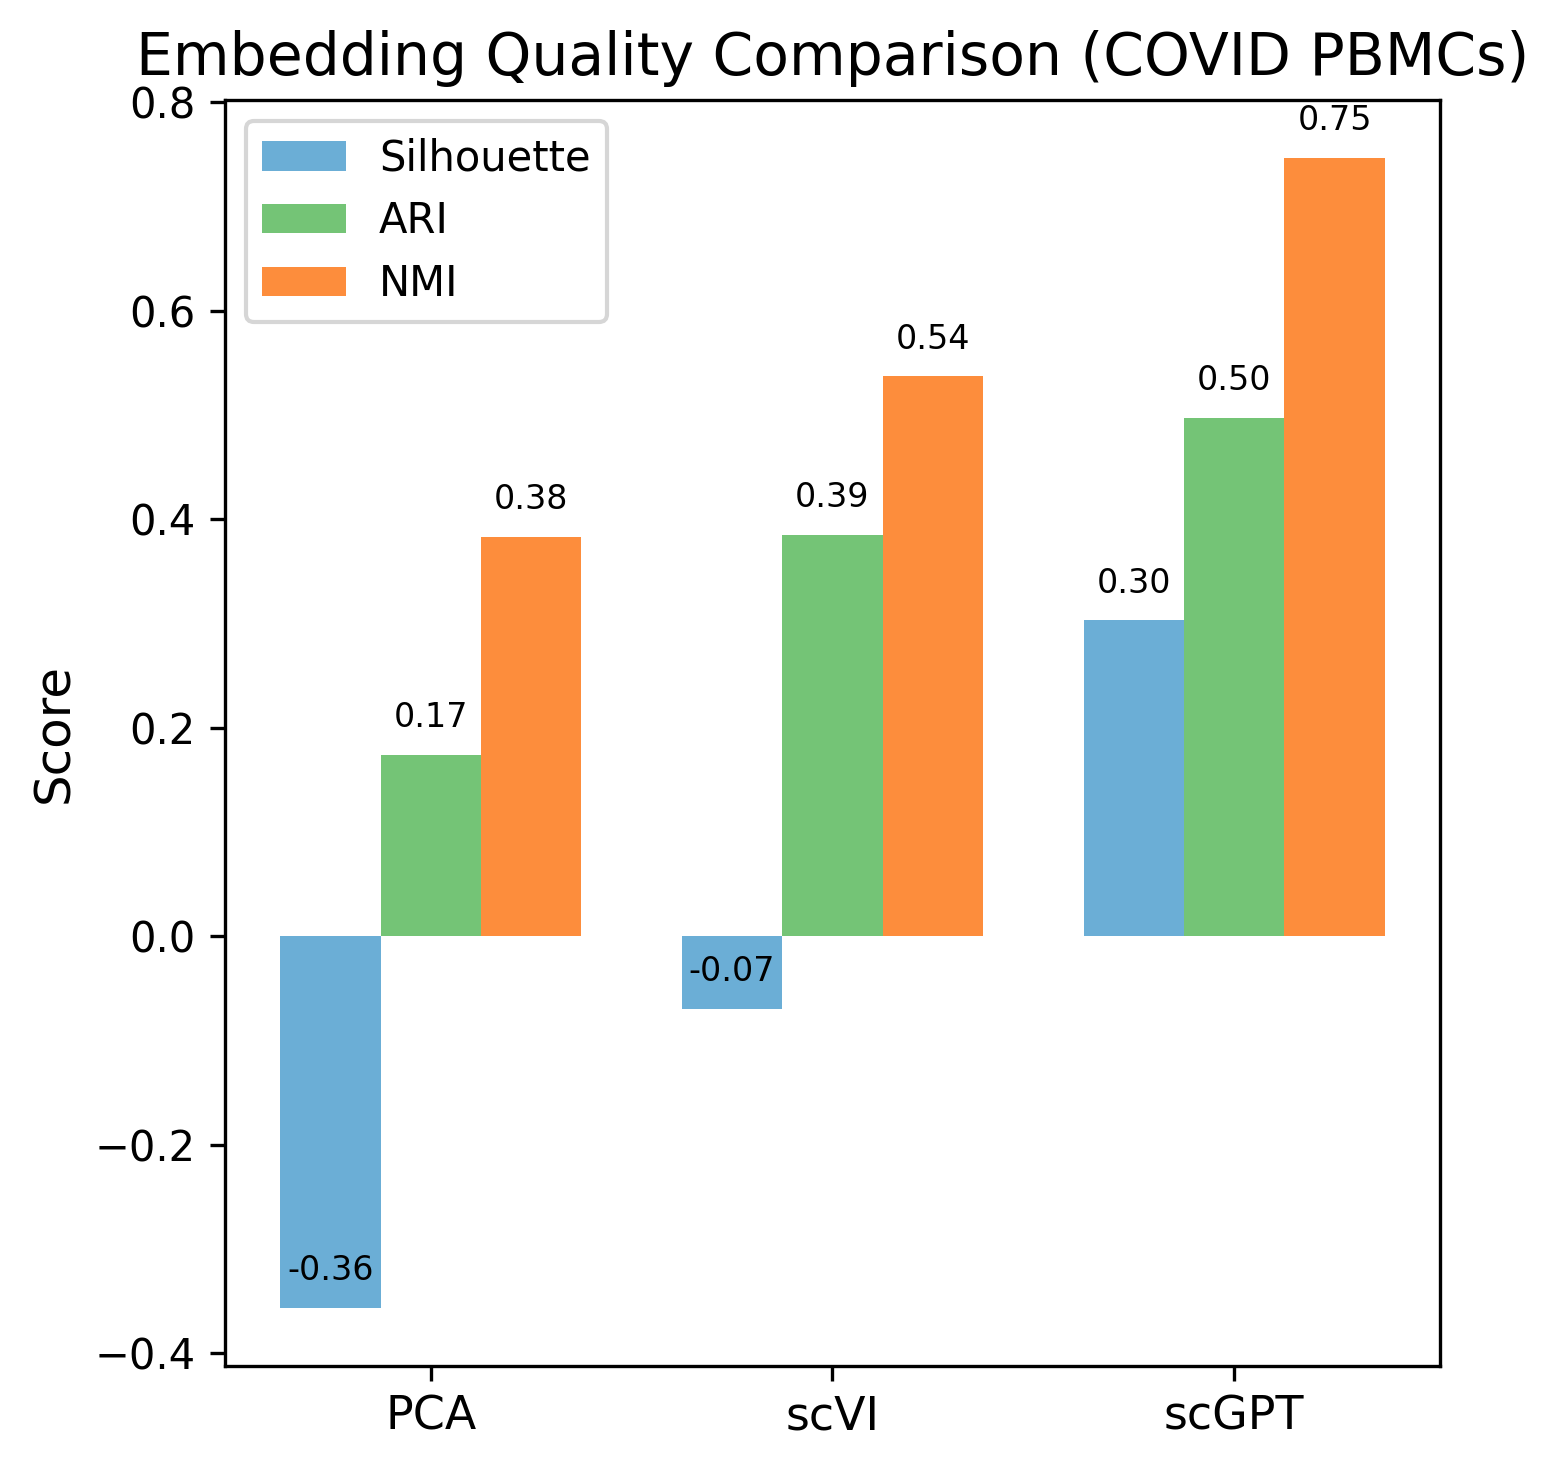

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric values
models = ['PCA', 'scVI', 'scGPT', 'scGPT (HVG)']
silhouette = [-0.357, -0.07, 0.303]
ari = [0.174, 0.385, 0.497]
nmi = [0.383, 0.537, 0.747]

x = np.arange(len(models))
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Plot bars
bars1 = ax.bar(x - width, silhouette, width, label='Silhouette', color='#6baed6')
bars2 = ax.bar(x, ari, width, label='ARI', color='#74c476')
bars3 = ax.bar(x + width, nmi, width, label='NMI', color='#fd8d3c')

# Add text labels
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# Axes and labels
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Embedding Quality Comparison (COVID PBMCs)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend()

plt.tight_layout()
plt.show()

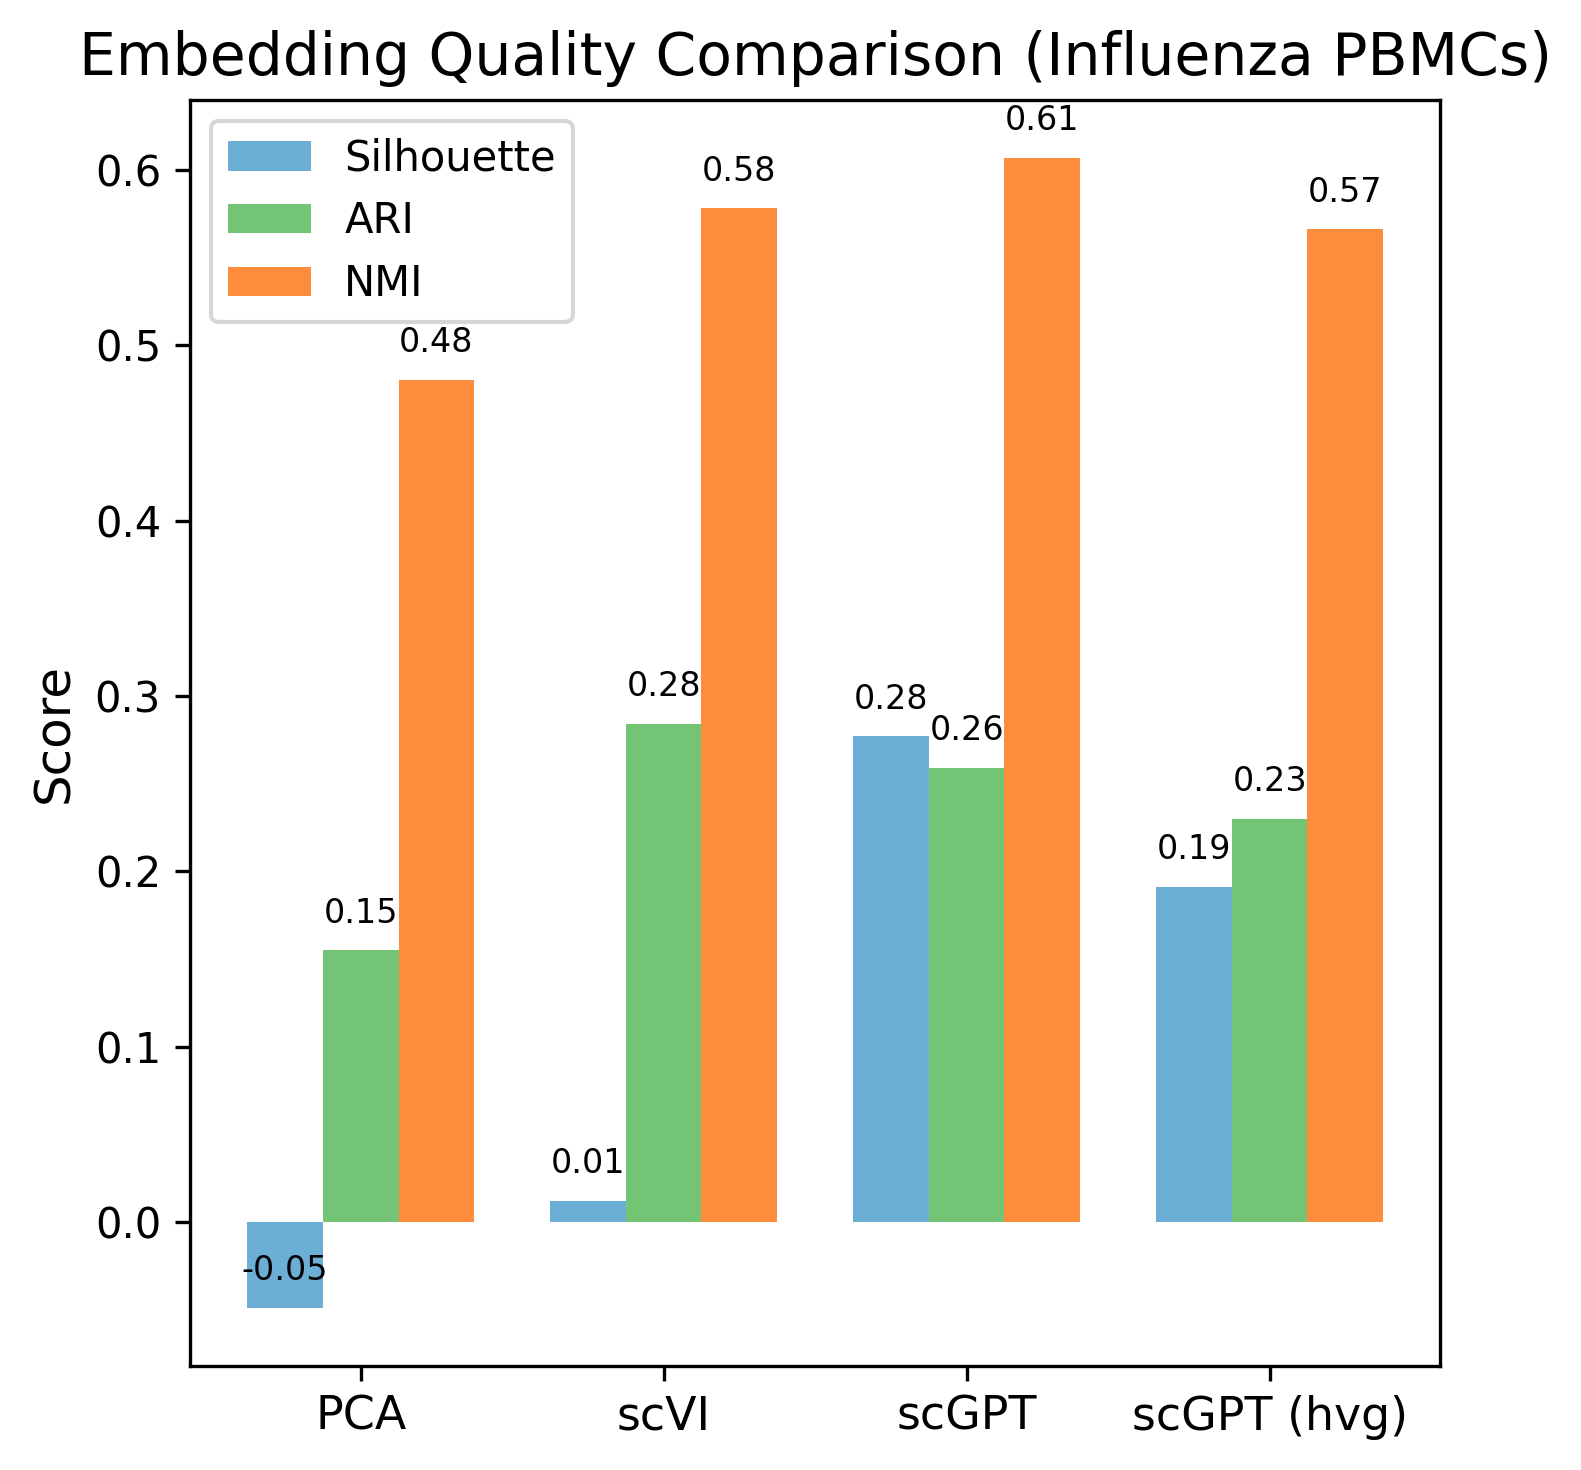

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Metric values
models = ['PCA', 'scVI', 'scGPT', 'scGPT (hvg)']
silhouette = [-0.049, 0.012, 0.277, 0.191]
ari = [0.155, 0.284, 0.259, 0.230]
nmi = [0.480, 0.578, 0.607, 0.566]

x = np.arange(len(models))
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Plot bars
bars1 = ax.bar(x - width, silhouette, width, label='Silhouette', color='#6baed6')
bars2 = ax.bar(x, ari, width, label='ARI', color='#74c476')
bars3 = ax.bar(x + width, nmi, width, label='NMI', color='#fd8d3c')

# Add text labels
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# Axes and labels
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Embedding Quality Comparison (Influenza PBMCs)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend()

plt.tight_layout()
plt.show()